In [1]:
import pandas as pd

file_path = 'Dataset_Proyecto3_ACTD.csv'

df = pd.read_csv(file_path)

print(df.head())

   periodo estu_tipodocumento  estu_consecutivo cole_area_ubicacion  \
0    20224                 TI  SB11202240068406              URBANO   
1    20224                 TI  SB11202240363282               RURAL   
2    20224                 TI  SB11202240285537              URBANO   
3    20224                 TI  SB11202240096028              URBANO   
4    20224                 TI  SB11202240066279              URBANO   

  cole_bilingue cole_calendario      cole_caracter  \
0             N               A  TÉCNICO/ACADÉMICO   
1             N               A            TÉCNICO   
2             N               A          ACADÉMICO   
3             N               A          ACADÉMICO   
4             N               A          ACADÉMICO   

   cole_cod_dane_establecimiento  cole_cod_dane_sede  \
0                   1.520010e+11        152001000785   
1                   2.520510e+11        252051000691   
2                   1.523560e+11        152356000182   
3                   3.52

In [2]:
# Convert punt_global to numeric to ensure proper categorization
df['punt_global'] = pd.to_numeric(df['punt_global'], errors='coerce')

# Categorize punt_global
def categorize_punt_global(punt_global):
    if 0 <= punt_global <= 199:
        return 'Malo'
    elif 200 <= punt_global <= 299:
        return 'Regular'
    elif 300 <= punt_global <= 500:
        return 'Bueno'
    else:
        return 'Desconocido'

df['punt_global_categoria'] = df['punt_global'].apply(categorize_punt_global)

# Display the first few rows to verify the new column
df[['punt_global', 'punt_global_categoria']].head()


,punt_global,punt_global_categoria
0,313.0,Bueno
1,200.0,Regular
2,353.0,Bueno
3,250.0,Regular
4,298.0,Regular


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

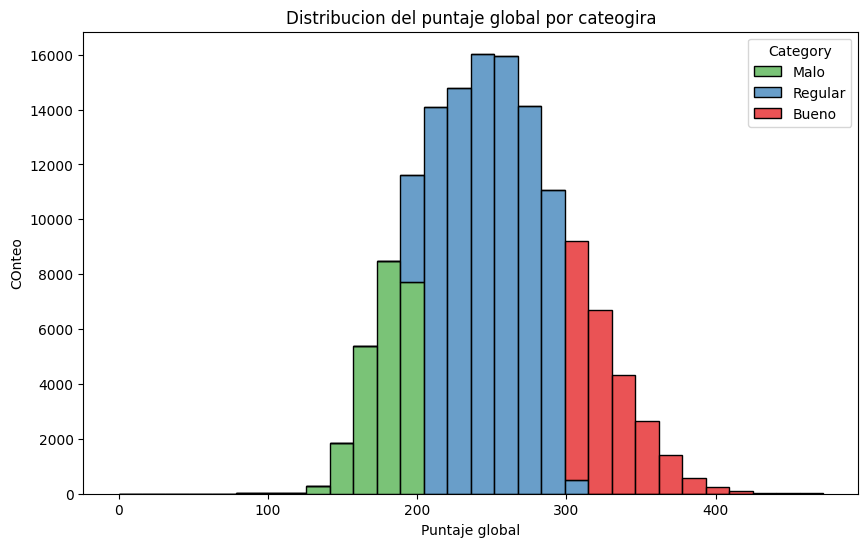

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribution of punt_global with categories
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=df, x='punt_global', hue='punt_global_categoria', multiple='stack', bins=30, palette="Set1")
plt.title('Distribucion del puntaje global por cateogira')
plt.xlabel('Puntaje global')
plt.ylabel('COnteo')
handles, labels = hist_plot.get_legend_handles_labels()
# Set legend title and labels
plt.legend(title='Category', labels=['Malo', 'Regular', 'Bueno'])
plt.show()



/var/folders/zd/vk2n04vs53z2yxjhs16jnmkc0000gn/T/ipykernel_89162/1005631665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fami_estratovivienda', y='punt_global', data=df,palette=palette)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.frame

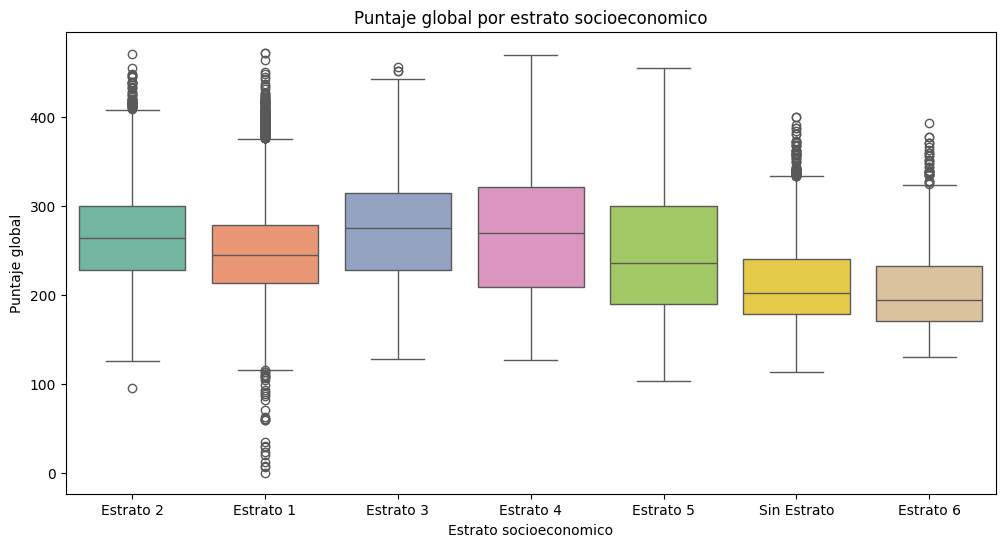

In [12]:
# Plot 2: Box plot of punt_global by socio-economic level
palette = sns.color_palette("Set2", n_colors=df['fami_estratovivienda'].nunique())
plt.figure(figsize=(12, 6))
sns.boxplot(x='fami_estratovivienda', y='punt_global', data=df,palette=palette)
plt.title('Puntaje global por estrato socioeconomico')
plt.xlabel('Estrato socioeconomico')
plt.ylabel('Puntaje global')
plt.show()


/var/folders/zd/vk2n04vs53z2yxjhs16jnmkc0000gn/T/ipykernel_89162/3067866602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='desemp_ingles', y='punt_global', data=df,palette=palette)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Ve

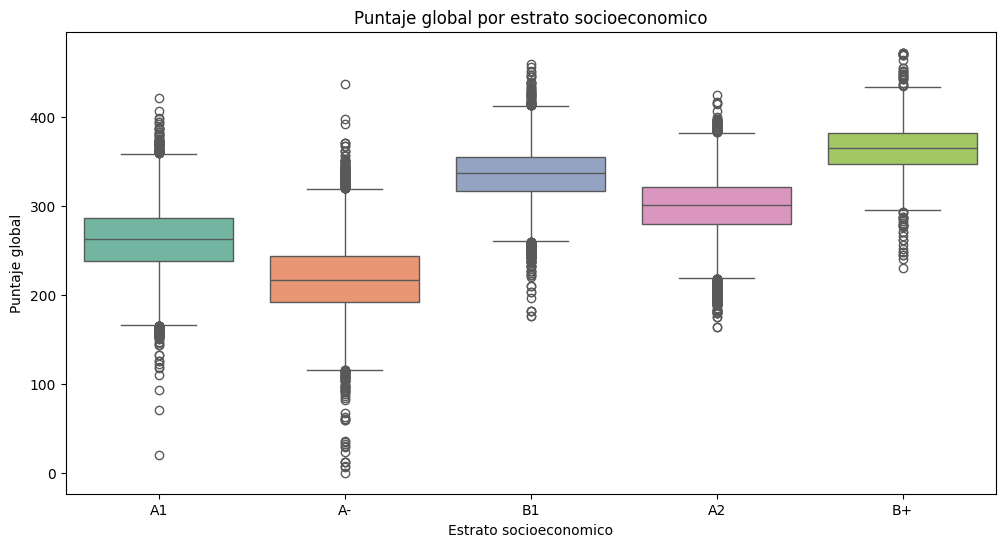

In [10]:
# Plot 2: Box plot of punt_global by socio-economic level
palette = sns.color_palette("Set2", n_colors=df['desemp_ingles'].nunique())
plt.figure(figsize=(12, 6))
sns.boxplot(x='desemp_ingles', y='punt_global', data=df,palette=palette)
plt.title('Puntaje global por estrato socioeconomico')
plt.xlabel('Estrato socioeconomico')
plt.ylabel('Puntaje global')
plt.show()